In [193]:
#loading need libraries
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import plotly.offline as py
py.init_notebook_mode(connected=True)
%matplotlib inline
plt.style.use('ggplot')
import plotly.graph_objs as go

In [207]:
data = pd.read_csv('State_time_series.csv',parse_dates=['Date'])

In [195]:
data

,Date,RegionName,DaysOnZillow_AllHomes,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,...,ZHVI_BottomTier,ZHVI_CondoCoop,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier,ZRI_AllHomes,ZRI_AllHomesPlusMultifamily,ZriPerSqft_AllHomes,Zri_MultiFamilyResidenceRental,Zri_SingleFamilyResidenceRental
0,1996-04-30,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,45600.0,99500.0,79500.0,79000.0,140200.0,NaN,NaN,NaN,NaN,NaN
1,1996-04-30,Arizona,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,67100.0,78900.0,103600.0,107500.0,168700.0,NaN,NaN,NaN,NaN,NaN
2,1996-04-30,Arkansas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,38400.0,70300.0,64400.0,64500.0,115200.0,NaN,NaN,NaN,NaN,NaN
3,1996-04-30,California,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,95100.0,136100.0,157900.0,162000.0,270600.0,NaN,NaN,NaN,NaN,NaN
4,1996-04-30,Colorado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,82700.0,99400.0,128100.0,133600.0,209300.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13207,2017-12-31,Virginia,NaN,39599.0,36664.0,242.105263,146.157362,143.816452,147.329650,153.763978,...,133500.0,291300.0,246200.0,237300.0,492700.0,1538.0,1500.0,0.948,1738.0,1441.0
13208,2017-12-31,Washington,NaN,17918.0,15109.0,304.291151,220.017256,195.881979,188.990826,201.271186,...,208200.0,337600.0,351300.0,352800.0,662700.0,1842.0,1803.0,1.132,1690.0,1828.0
13209,2017-12-31,WestVirginia,NaN,9800.0,9422.0,119.723429,77.764277,89.272003,93.071172,88.122881,...,63800.0,115100.0,103500.0,103300.0,174300.0,858.0,858.0,0.674,846.0,858.0
13210,2017-12-31,Wisconsin,NaN,27273.0,23370.0,145.664583,129.727412,127.136334,116.753927,95.573529,...,107200.0,158700.0,169300.0,170200.0,280600.0,1179.0,1153.0,0.920,1068.0,1163.0


In [196]:
print('Date range:{} to {}'.format(data['Date'].min(),data['Date'].max()))
print('Number of States',data['RegionName'].nunique())

Date range:1996-04-30 00:00:00 to 2017-12-31 00:00:00
Number of States 52


### Null Values
Checking null values in the data

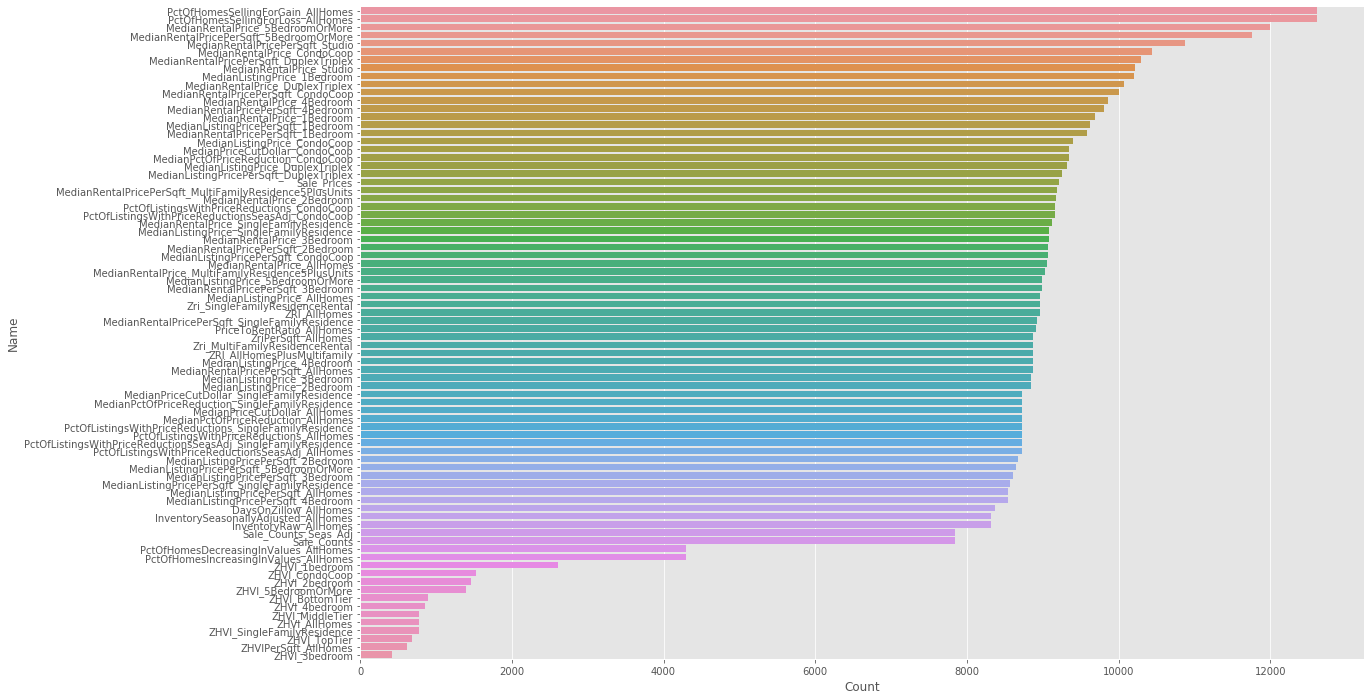

In [197]:
miss = data.isnull().sum()
miss = miss[miss>0]
miss.sort_values(inplace=True, ascending=False)
miss = pd.DataFrame(miss, columns=['Count'])
miss['Name'] = miss.index
miss_cols = miss['Name'].tolist()
plt.subplots(figsize=(18, 12))
sns.barplot(x='Count',y='Name',data=miss)

### Top 7 States of Median Price Per Sqft
Top 7 states of Median Listring Price per Sqft All Homes

In [ ]:
dfallhomes = data.groupby('RegionName', as_index=False)['MedianListingPricePerSqft_AllHomes'].\
    mean().dropna().sort_values('MedianListingPricePerSqft_AllHomes', ascending=False)
dfallhomes.head(7)

In [ ]:
plt.subplots(figsize=(18, 12))
sns.barplot(dfallhomes['RegionName'],dfallhomes['MedianListingPricePerSqft_AllHomes'])
plt.xticks(rotation=90)

### Median of list prices per square foot in different year
Median of list prices divided by the square footage of a home

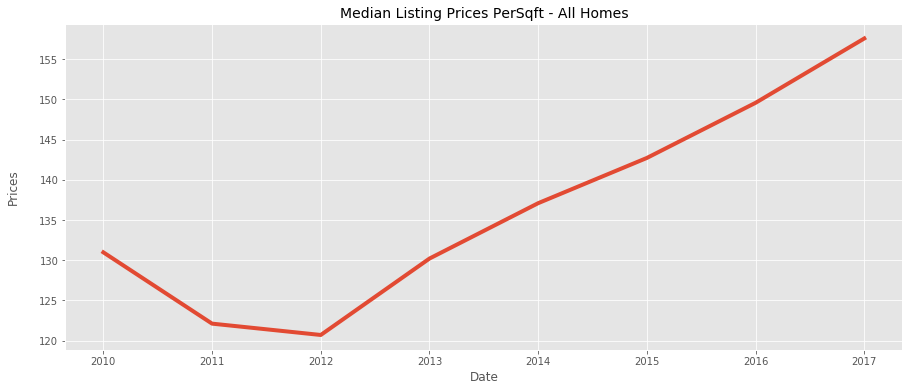

In [209]:
plt.title('Median Listing Prices PerSqft - All Homes', fontsize=14)
data.groupby(data['Date'].dt.year)['MedianListingPricePerSqft_AllHomes'].mean().dropna().plot(linewidth=4, figsize=(15, 6))
plt.ylabel('Prices\n')
plt.show()

### Rent Prices
Rent Prices by region 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 <a list of 49 Text xticklabel objects>)

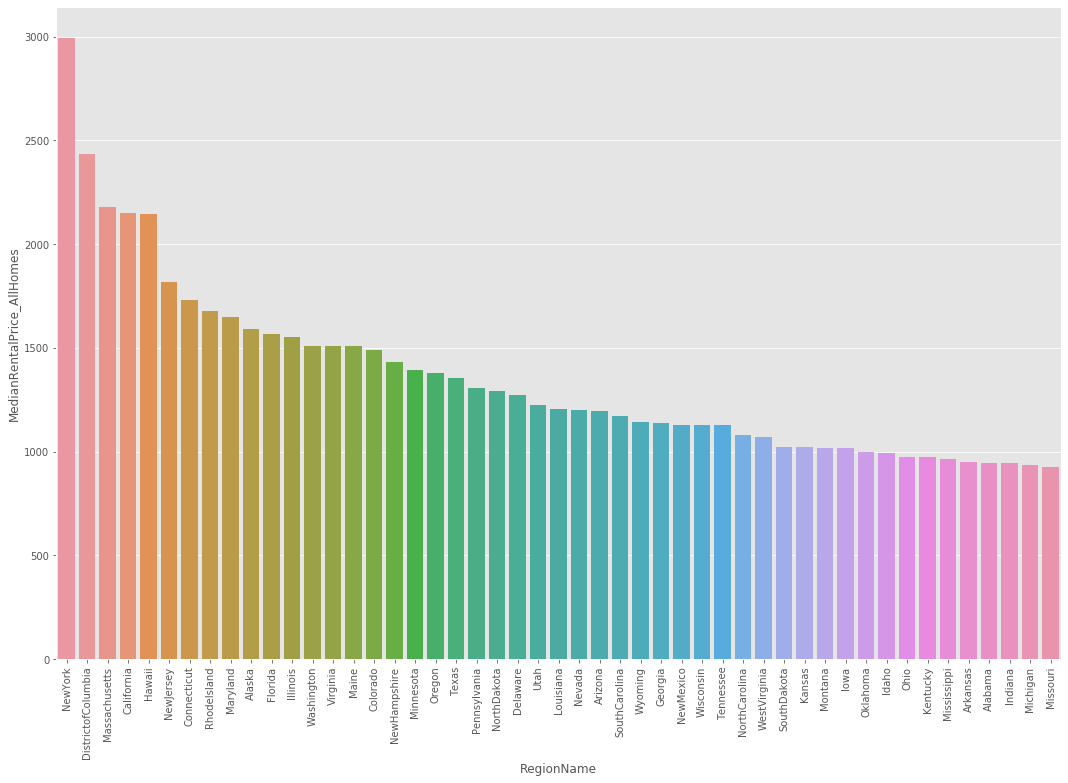

In [211]:
dfallhomes = data.groupby('RegionName', as_index=False)['MedianRentalPrice_AllHomes'].\
    mean().dropna().sort_values('MedianRentalPrice_AllHomes', ascending=False)
dfallhomes.head(7)
plt.subplots(figsize=(18, 12))
sns.barplot(dfallhomes['RegionName'],dfallhomes['MedianRentalPrice_AllHomes'])
plt.xticks(rotation=90)

Rent Prices by year

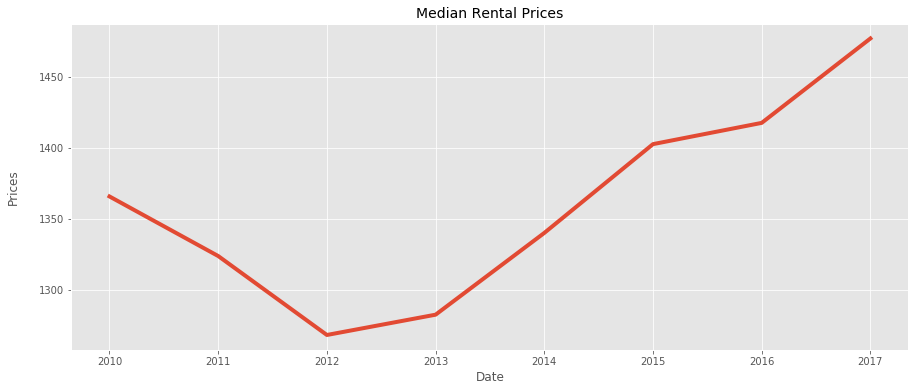

In [212]:
plt.title('Median Rental Prices', fontsize=14)
data.groupby(data['Date'].dt.year)['MedianRentalPrice_AllHomes'].mean().dropna().plot(linewidth=4, figsize=(15, 6))
plt.ylabel('Prices\n')
plt.show()

### How Long to Sell
how long it takes to sell a house, and how it changed through out the years

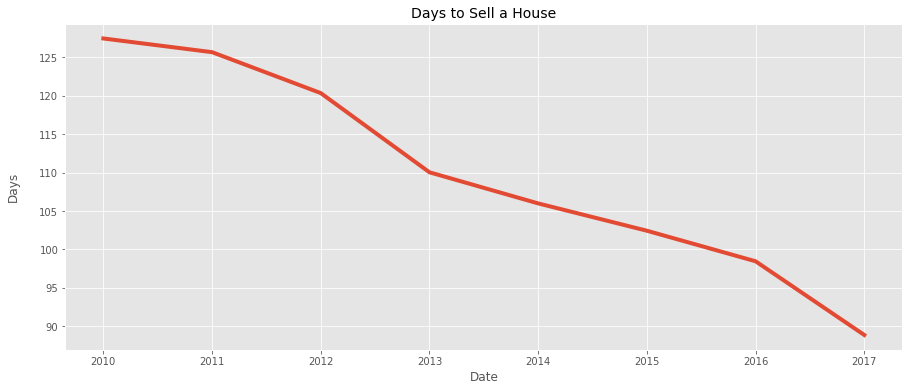

In [213]:
plt.title('Days to Sell a House', fontsize=14)
data.groupby(data['Date'].dt.year)['DaysOnZillow_AllHomes'].mean().dropna().plot(linewidth=4, figsize=(15, 6))
plt.ylabel('Days\n')
plt.show()

### Different home value in different year
Different bed room values in different year

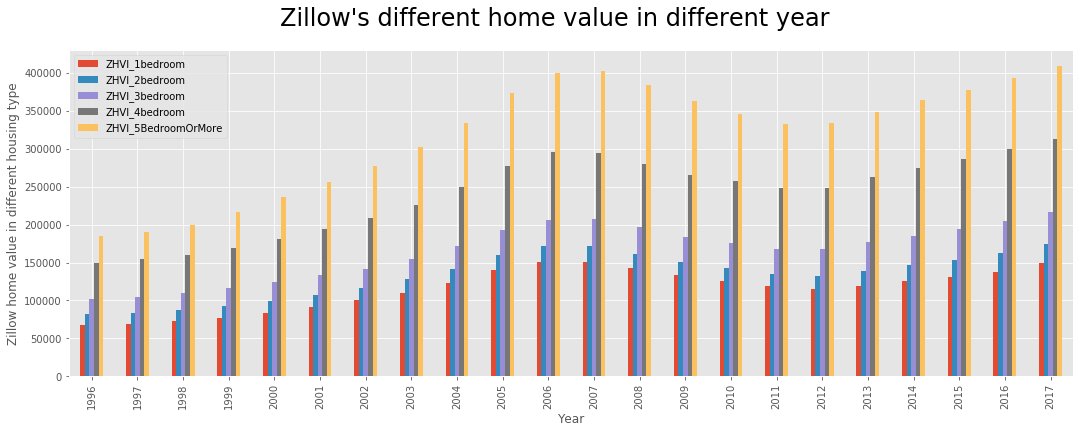

In [214]:
data.groupby(data.Date.dt.year)[['ZHVI_1bedroom','ZHVI_2bedroom','ZHVI_3bedroom','ZHVI_4bedroom','ZHVI_5BedroomOrMore']].\
mean().plot(kind='bar', figsize=(18, 6))
plt.suptitle("Zillow's different home value in different year", fontsize=24)
plt.ylabel('Zillow home value in different housing type')
plt.xlabel('Year')
plt.show()

### Median of rental prices per square foot in different year
Median of the rental price per square foot of homes

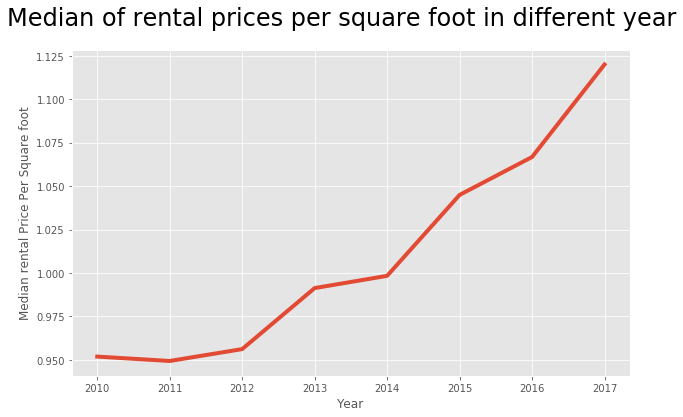

In [215]:
data.groupby(data.Date.dt.year)['MedianRentalPricePerSqft_AllHomes'].mean().dropna().plot(linewidth=4, figsize=(10, 6))
plt.suptitle('Median of rental prices per square foot in different year', fontsize=24)
plt.ylabel('Median rental Price Per Square foot')
plt.xlabel('Year')
plt.show()

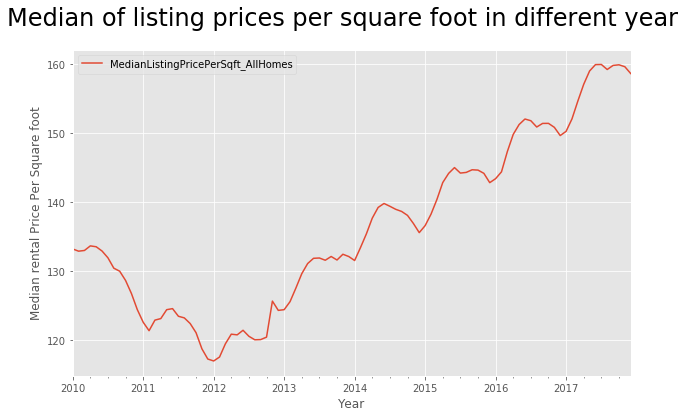

In [216]:
data.groupby('Date')['Date','MedianListingPricePerSqft_AllHomes'].mean().dropna().plot(kind='line', figsize=(10, 6))
plt.suptitle('Median of listing prices per square foot in different year', fontsize=24)
plt.ylabel('Median rental Price Per Square foot')
plt.xlabel('Year')
plt.show()

### ARIMA forecast model
One of the common model used to forecast time series data is ARIMA. It stands for Autoregressive integrated moving average.

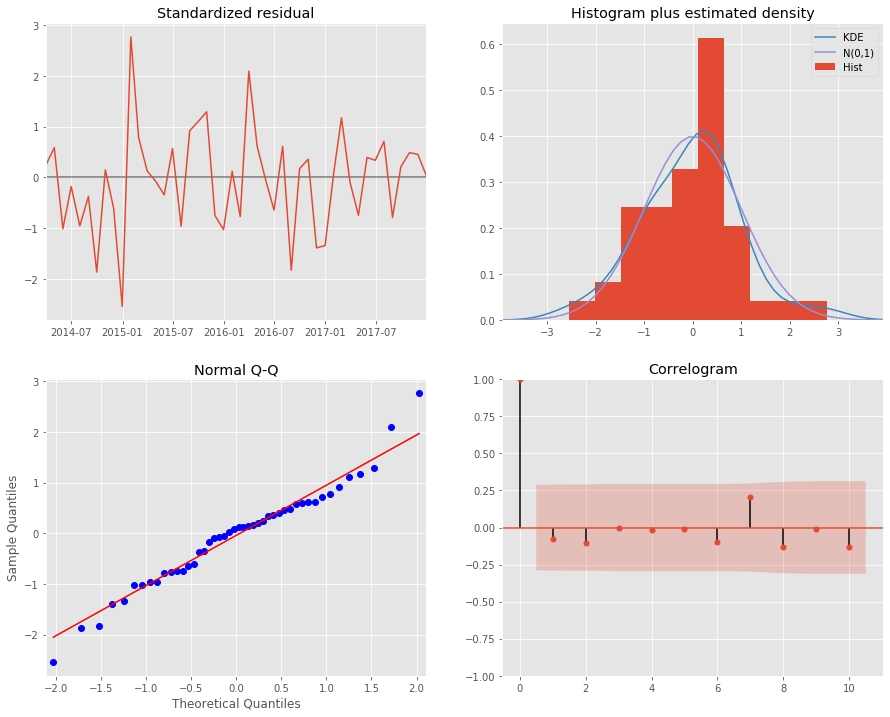

In [217]:
data = data[data['Date'] >= '01-01-2010']
allhomes = data.groupby('Date')['Date','MedianListingPricePerSqft_AllHomes'].mean().dropna()
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
mod = sm.tsa.statespace.SARIMAX(allhomes,
                                    order = (2, 0, 4),
                                    seasonal_order = (3, 1, 2, 12),
                                    enforce_stationarity = False,
                                    enforce_invertibility = False)
results = mod.fit()
results.plot_diagnostics(figsize=(15,12))
plt.show()

### Validate the Model
Validate the model by Train Test & Split.

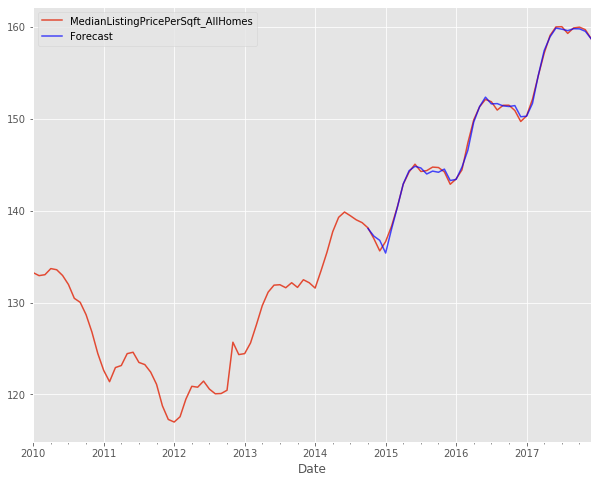

In [233]:
train_size = int(len(allhomes) * 0.60)
train, test = allhomes[0:train_size], allhomes[train_size:]

pred = results.get_prediction(start = test.iloc(0)[0].name, dynamic = False)
pred_ci = pred.conf_int()

ax = allhomes.plot(label='actual', figsize=(10,8))
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=0.7, color='blue')
plt.legend()
plt.show()

In [227]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(test, pred.predicted_mean)
print('MSE {}'.format(error))

MSE 0.17152637204952167


### Predict for the future listing prices

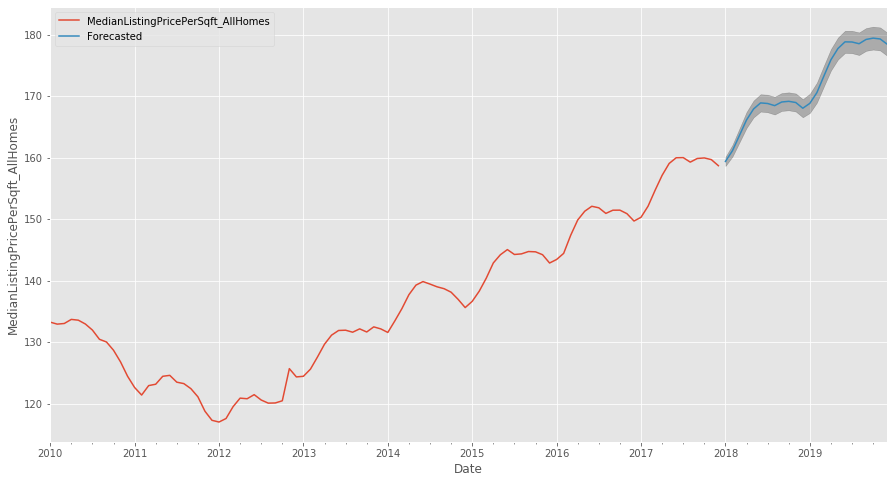

In [236]:
pred_uc = results.get_forecast(steps=24)

pred_ci = pred_uc.conf_int()

ax = allhomes.plot(label = 'Actual', figsize=(15,8))
pred_uc.predicted_mean.plot(ax=ax, label='Forecasted')
ax.fill_between(pred_ci.index,
                   pred_ci.iloc[:,0],
                   pred_ci.iloc[:,1],
                   color='k', alpha=0.25)
ax.set_xlabel('Date')
ax.set_ylabel('MedianListingPricePerSqft_AllHomes')
plt.legend()
plt.show()